The aim of this classification is to predict if a patient will suffer cancer or not

Now we load the dataset and replace the ? values for NaN values

In [1]:
import numpy as np
import pandas as pd

data_set_cancer = pd.read_csv('./kag_risk_factors_cervical_cancer.csv')
data_set_cancer = data_set_cancer.replace('?', np.NaN)

FileNotFoundError: File b'./kag_risk_factors_cervical_cancer.csv' does not exist

In [2]:
print(data_set_cancer)

     Age Number of sexual partners First sexual intercourse  \
0     18                       4.0                     15.0   
1     15                       1.0                     14.0   
2     34                       1.0                      NaN   
3     52                       5.0                     16.0   
4     46                       3.0                     21.0   
5     42                       3.0                     23.0   
6     51                       3.0                     17.0   
7     26                       1.0                     26.0   
8     45                       1.0                     20.0   
9     44                       3.0                     15.0   
10    44                       3.0                     26.0   
11    27                       1.0                     17.0   
12    45                       4.0                     14.0   
13    44                       2.0                     25.0   
14    43                       2.0                     

Our data has many missing values, thus we should replace the missing values with the mean of the corresponding column

In [3]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

We create the KNN classifier imported from sklearn

In [4]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors = 5, algorithm = "kd_tree")

targets = data_set_cancer['Dx:Cancer'].value_counts()
print(targets)
print("Minority class represents just ",(targets[1]/len(data_set_cancer))*100, " % of the dataset")

0    840
1     18
Name: Dx:Cancer, dtype: int64
Minority class represents just  2.097902097902098  % of the dataset


We now split the training data and testing data.

In [15]:
from sklearn import model_selection
from sklearn import preprocessing

training_data = data_set_cancer.loc[:, data_set_cancer.columns != 'Dx:Cancer']
label_training = data_set_cancer.loc[:, data_set_cancer.columns == 'Dx:Cancer']

training_data, testing_data, label_training, label_testing = model_selection.train_test_split(training_data, label_training, test_size = 0.2, random_state = 0)

print(testing_data)

     Age Number of sexual partners First sexual intercourse  \
144   30                       2.0                     17.0   
774   43                       4.0                     16.0   
263   23                       2.0                     14.0   
788   38                       2.0                     19.0   
847   30                       3.0                     22.0   
162   28                       1.0                     23.0   
737   20                       2.0                     16.0   
521   42                       2.0                     18.0   
519   19                       1.0                     17.0   
60    34                       3.0                     19.0   
523   32                       4.0                     17.0   
101   30                       5.0                     16.0   
716   19                       3.0                     15.0   
299   23                       3.0                     18.0   
661   23                       5.0                     

In [24]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
training_data, label_training = sm.fit_sample(training_data, label_training)

ImportError: cannot import name '_check_large_sparse' from 'sklearn.utils.validation' (/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py)

We now sustitute the missing values with the mean for both datasets individually

In [6]:
imp = imp.fit(training_data)
training_data = imp.transform(training_data)

imp = imp.fit(testing_data)
testing_data = imp.transform(testing_data)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data= pd.DataFrame(training_data))
plt.show()

<Figure size 640x480 with 1 Axes>

Now we apply the standarization for the values of both datasets

In [8]:
scaler = preprocessing.StandardScaler()
training_data = scaler.fit_transform(training_data)

testing_data = scaler.fit_transform(testing_data)

In [9]:
print(label_training)

     Dx:Cancer
196          0
645          0
122          0
852          0
167          0
278          0
346          0
239          0
10           0
484          0
68           0
375          0
432          1
681          0
231          0
386          0
406          0
214          0
2            0
849          1
487          0
494          0
694          0
622          0
154          0
803          0
791          0
585          0
279          0
471          0
..         ...
115          0
777          0
72           0
537          0
677          0
841          0
174          0
87           0
551          0
486          0
705          0
314          0
396          0
600          0
472          0
70           0
599          0
804          0
754          0
277          0
723          0
9            0
359          0
707          0
763          1
835          0
192          0
629          0
559          0
684          0

[686 rows x 1 columns]


In [10]:
clf = knn.fit(training_data, label_training.values.ravel())

In [11]:
results = clf.predict(testing_data)
print(label_training)

     Dx:Cancer
196          0
645          0
122          0
852          0
167          0
278          0
346          0
239          0
10           0
484          0
68           0
375          0
432          1
681          0
231          0
386          0
406          0
214          0
2            0
849          1
487          0
494          0
694          0
622          0
154          0
803          0
791          0
585          0
279          0
471          0
..         ...
115          0
777          0
72           0
537          0
677          0
841          0
174          0
87           0
551          0
486          0
705          0
314          0
396          0
600          0
472          0
70           0
599          0
804          0
754          0
277          0
723          0
9            0
359          0
707          0
763          1
835          0
192          0
629          0
559          0
684          0

[686 rows x 1 columns]


In [12]:
from sklearn import metrics
print(metrics.accuracy_score(label_testing, results))

1.0


In [13]:
from sklearn.metrics import confusion_matrix
cf_mat = confusion_matrix(y_true=label_testing, y_pred=results)
print('Confusion matrix:\n', cf_mat)

Confusion matrix:
 [[171   0]
 [  0   1]]


Now we are going to apply the outliers statistics to see what happens

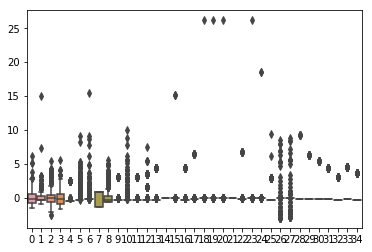

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data= pd.DataFrame(training_data))
plt.show()